In [ ]:
import numpy as np
from keras.models import Sequential
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout,Flatten
from keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import tensorflow as tf
from skimage import color

In [ ]:
(x_train, y_train), (x_test, y_test) =cifar10.load_data()


x_train = color.rgb2gray(x_train)
print(x_train.shape)
x_test = color.rgb2gray(x_test)
print(x_test.shape)

(50000, 32, 32)
(10000, 32, 32)


In [ ]:

x= x_test
x_train = x_train.reshape(50000,1024)
x_test = x_test.reshape(10000,1024)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# đưa giá trị về từ 0-1
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
Model = Sequential()
Model.add(Dense(512, activation='relu',input_shape = (1024,)))
Model.add(Dropout(0.1))
Model.add(Dense(512,activation='relu'))
Model.add(Dropout(0.1))
Model.add(Dense(512,activation='relu'))
Model.add(Dropout(0.1))
Model.add(Dense(10,activation='softmax'))
Model.summary()
Model.compile(loss='mean_squared_error',optimizer =RMSprop(), metrics=['accuracy'])
history = Model.fit(x_train, y_train, batch_size =256, epochs = 400, validation_split = 0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 10)               

In [ ]:
score = Model.evaluate(x_test,y_test,verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0831 - accuracy: 0.4470


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


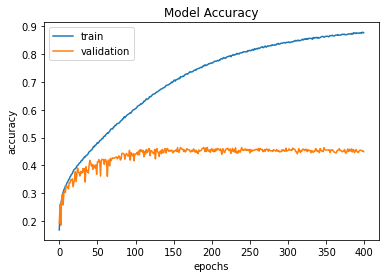

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [ ]:
y_pred = Model.predict(x_test)

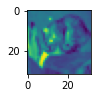

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


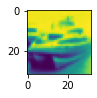

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


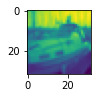

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


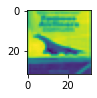

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


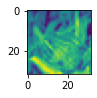

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


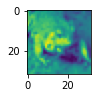

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


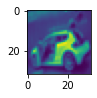

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


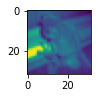

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


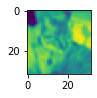

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
import numpy as np
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(x[i])
  plt.show()
  print(np.round(y_pred[i]))

In [ ]:
Model.save('Cifar10.h5')